# Linear regression - Importing CSV data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

import ipywidgets as widgets
from ipywidgets import interact

## Data

Data about wages in Canada compiled by the province of Ontario.

* [Source](https://open.canada.ca/data/en/dataset/1f14addd-e4fc-4a07-9982-ad98db07ef86)
* [Licence](https://www.ontario.ca/page/open-government-licence-ontario)

In [2]:
url = 'https://data.ontario.ca/dataset/1f14addd-e4fc-4a07-9982-ad98db07ef86/resource/7b325fa1-e9d6-4329-a501-08cdc22a79df/download/v0913_05.csv' 
raw_data = pd.read_csv(url)

In [3]:
@interact(geography=widgets.Dropdown(options=raw_data.Geography.unique(),
                                     description='Region'))
def select_data(geography):
    """
    Retrieves average hourly wage rate for a region
    """

    global df
    df = raw_data[(raw_data['Education level'] == 'Total, all education levels') &
                  (raw_data['Age group'] == '15 years and over ') &
                  (raw_data['Geography'] == geography) &
                  (raw_data['Type of work'] == '   Full-time ') &
                  (raw_data['Wages'] == 'Average hourly wage rate')].copy()

    df.drop('Education level', axis=1, inplace=True)
    df.drop('Age group', axis=1, inplace=True)
    df.drop('Geography', axis=1, inplace=True)
    df.drop('Type of work', axis=1, inplace=True)
    df.drop('Wages', axis=1, inplace=True)

    df.rename(columns={'YEAR': 'Year',
                       'Both Sexes': 'Both Sexes',
                       '  Male': 'Men',
                       '  Female': 'Women'}, inplace=True)
    
    plt.plot(df.Year, df.Men, 'o', label='Men')
    plt.plot(df.Year, df.Women, 'o', label='Women')
    plt.xlabel('Years')
    plt.ylabel('Average hourly wage rate')
    plt.legend()
    plt.show()

interactive(children=(Dropdown(description='Region', options=('Canada', 'Newfoundland and Labrador', 'Prince E…

## Linear regression with SciKit Learn

A simple example how to use [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) when original data is in a CSV file.<br>
Note how the data has to be reshaped.

In [4]:
reg = LinearRegression()
X = np.c_[df.Year]
y = df.Men
reg.fit(X, y)

LinearRegression()

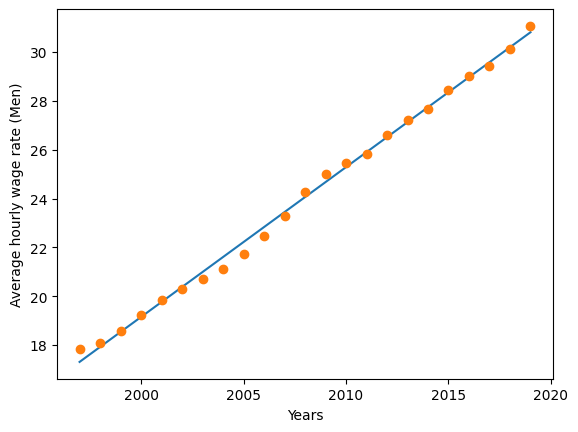

In [5]:
plt.plot(X, reg.predict(X), '-')
plt.plot(X, y, 'o')
plt.xlabel('Years')
plt.ylabel('Average hourly wage rate (Men)')
plt.show()